# 成本函数可视化

> [Machine Learning | Coursera](https://www.coursera.org/specializations/machine-learning-introduction)

## Tools

除了之前用到的 `NumPy` 和 `Matplotlib`，这次还需要自行编写可视化脚本。我这里用的是[Coursera: Machine Learning Optional Lab1-3](https://www.coursera.org/learn/machine-learning/ungradedLab/udPHh/optional-lab-cost-function)中的可视化脚本。这个脚本在Github上是[开源的](https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week1/Optional%20Labs/lab_utils_uni.py)，感兴趣的可以自行前往体验。


In [1]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
from src.visual import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('seaborn-v0_8')


## Problem Statement and Mathematical Modeling

由于前面章节的例子针对回归模型的定义而言并不是很严谨，这次我们采用一元线性回归模型最经典的**房价预测模型**为例进行可视化实验。

同样的，首先需要准备好训练样本数据：

| Size (1000 sqft) | Price ($) |
|:----------------:|:---------:|
|   1   |   300   |
|   2   |   512   |
|   3   |   703   |
|   4   |   905   |
|   5   |   1113  |


In [2]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([300.0, 512.0, 703.0, 905.0, 1113.0])


## Compute the Cost Function

根据前面所学易得，对于一元线性回归模型，有单变量成本函数:

$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1}(f_{w,b}(x^{(i)}) - y^{(i)})^2
$$

其中模型函数 $f_{\theta}(x_{1}^{(i)})$ 为:

$$
f_{w, b}(x^{(i)}) = wx^{(i)} + b
$$

> 注意这里的求和的起点索引为 $0$，这是由于在编程语言中数据索引通常从零开始。

成本函数的代码实现如下：


In [3]:
def compute_cost(x, y, w, b) -> float:
    """计算一元线性回归模型的成本函数
    
    Args:
        x (np.ndarray): 输入数据
        y (np.ndarray): 目标数据
        w (float): 模型参数
        b (float): 模型参数
    """
    m = x.shape[0]
    cost = 0.0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = (1 / (2 * m)) * cost

    return total_cost
    

## Visualization

### 2D Visualization

显然，我们训练这个预测模型的最终目标是为了能够使用它尽可能准确地预测房屋的价值。

通过理论学习我们得知，当成本函数最小化时，模型的拟合程度最好。下面是可视化：


In [4]:
plt_intuition(x_train, y_train)


interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…


<figure>
    <center> <img alt="成本函数-二维可视化" src="../assets/cost-func-visual/visual_example.png"  ></center>
</figure>   

如图（插件当前不支持实时预览，这是调参截图），显然 `w` 为 $200$ 时，模型函数的拟合度最高。


### 3D Visualization

上面的二维可视化仅仅针对 `w` 一个变量进行调参，这时的成本函数 $J(\theta)$ 是一个**一元函数**。

下面，我们将 `b` 也纳入调参操作中，这样就会得到一个**二元**的 $J(\theta)$:


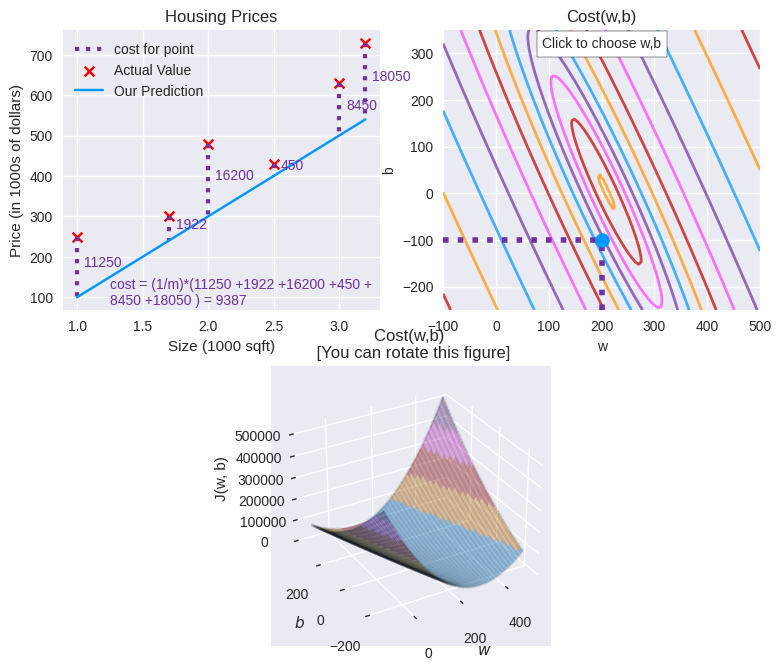

In [5]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 302, 480, 430, 630, 730])

plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick()


为了能够在二维层面清晰呈现成本函数，图的右上角使用了类似**等高线**的描述方式。

### Convex Cost Surface

成本函数对损失进行平方处理，确保了"误差曲面"呈凸型，就像汤碗一样。它总会有一个最小值，可以通过沿着所有维度的梯度下降达到。在前一个图表中，由于 $w$ 和 $b$ 的维度缩放比例不同，这一点不太容易辨认。下面的图表中，$w$ 和 $b$ 是对称的:


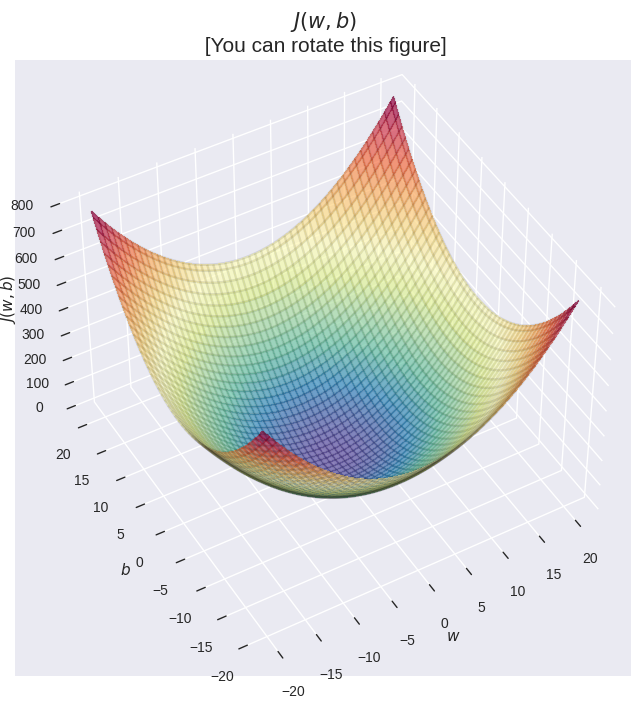

In [6]:
soup_bowl()